# **Introduction to Data Analysis and Visualization with Pandas for Biological Data - EXTRA TASK**

### Tutorial for participants of PyCon PL 2023, Gliwice, 29.06-02.07.2023
### Lidia Lipińska-Zubrycka (University of Warsaw) & Igor Zubrycki (Lodz University of Technology)

## Description of data


We're going to look at real data from an advanced technology called **NGS (next-generation sequencing)**. We're focusing on a type of yeast called ***S. pombe***. This yeast is a popular choice for research because it's simple and well-understood, and we can use it for many different studies. This helps us learn more about it at a molecular level. (Picture: Jürgen Berger/Max Planck Institute for Developmental Biology)


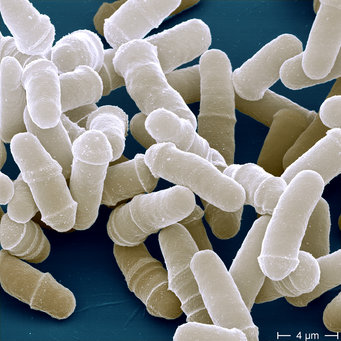

The data that we are going to work with has already undergone an initial analysis. The original data was in fastq format, a widely used format for storing biological sequence data. The fastq format not only stores the nucleotide sequences but also their corresponding quality scores, which are crucial for downstream analyses.

Example:


```
CNAAAGGGATTATCTCTTTGCTAATTTTTTAAATAACTGGAAATTGCCTAATTACACAATTTTTTTTCTGACAATGCCCTGTCTCTTATACACATCTCCGA
+
F#FFFFFFF:FFFFFFFFFFFFFFFFFFFFFF,FFFFFFFFFFFFFFFFFFFFFFFFFFF::FFFFFFFFFFFFF:FFFFFFFFFFFFFFFFFF:FFFFFF
@A00805:133:HCFHYDMXY:1:1101:15302:1000 1:N:0:ACCTGGCC+CATAGTAA
CNATTTTTTACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAATGGAGTAAAAAAAAAAAAAAAACCACACCACACCACGCCC
+
F#FFFFFFF:FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF:F,,FF,FF:,,,,,,,,,,:F,F,::::,,,,,F,,,,,:,,,F,,,,,F
@A00805:133:HCFHYDMXY:1:1101:7292:1031 1:N:0:ACCTGGCC+CATAGTAA
ATACACATCTCCGAGCCCACGAGACACCTGGCCAAATCTCGGGGGGGGGGGGGGGGGGGGGGGTGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG
+
FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF:FFFF:,,FF:,,F,::,,,::F::,FF,,,,,,:F:F:FFFFFFFFFFFFFFFFFFFFFFFFFFFFFF
@A00805:133:HCFHYDMXY:1:1101:16188:1031 1:N:0:ACCTGGCC+CATAGTAA
CCTAGCCACAGAACTCAACACGGATGATGATAGAAGGCACCGTTGCCCGCAGAGTGAGAATATTTACTTCTTTGAGGATGTGCTGATCGATTTGGCTTTTT
+
FFFF:F:F,FFFFF,FFFFFF,FFF::FFFF:F:FFF:FFFFF,,FF,F,F:FF:FF:FF,,FFFFFFFFFFFFF:F:F:,,F,FFF,FF:,FFFFF,FFF
```

**The smallest unit in fastq data names "READ".**

Example of one READ:
```
@A00805:133:HCFHYDMXY:1:1101:16188:1031 1:N:0:ACCTGGCC+CATAGTAA
CCTAGCCACAGAACTCAACACGGATGATGATAGAAGGCACCGTTGCCCGCAGAGTGAGAATATTTACTTCTTTGAGGATGTGCTGATCGATTTGGCTTTTT
+
FFFF:F:F,FFFFF,FFFFFF,FFF::FFFF:F:FFF:FFFFF,,FF,F,F:FF:FF:FF,,FFFFFFFFFFFFF:F:F:,,F,FFF,FF:,FFFFF,FFF
```


In data preparation, the first step is to filter out low-quality and ambiguous data, ensuring that our analyses are based on the most reliable and clear information. This process often involves tools that read the fastq files, assess the quality of reads, and discard the ones that do not meet certain quality criteria.

Following the cleaning process, the data is mapped to the reference genome, which involves aligning the sequence data to a known reference genome. This is an important step because it allows us to identify the genomic locations of our sequences.

Finally, after mapping, we perform the main analysis using Python. In this environment, we can apply various statistical and machine learning techniques to uncover patterns, make inferences, and draw conclusions from our mapped sequence data. This involves usage of libraries such as pandas, numpy, and seaborn for data manipulation, analysis, and visualization. Python's versatility and the powerful tools it provides make it an excellent choice for performing such complex biological data analyses.

## Import libraries

In addition to Pandas, which is not part of the Python standard library, we must import other necessary libraries for data manipulation, visualization, and scientific computation. These include NumPy, Seaborn, and Matplotlib. We instruct Python to load these libraries with the following code:

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# %#matplotlib inline

The %matplotlib inline directive is used specifically in Jupyter notebooks, allowing us to see plots or graphs within the notebook itself, directly below the code cells that produce them. This makes for an interactive visually-oriented coding experience.

In [47]:
# Load data using read_csv()
tails = pd.read_csv("data_RNAtails_wt.csv")

tails.head()

,read_ID,chr,start_R1,stop_R1,strand_R1,gene_start,gene_stop,gene,coord_R2,cigar,seq_R2,RNA_type,tail_fromcigar,tail_LENcigar,tail_fromGREP,tail_from,tail_type,stop_R2,distance_to_TES,tail
0,A01330:100:HJ2G7DRX2:1:1101:10059:25551:TTGAGT,I,3845085,3845186,-,3844742,3846645,SPAC4H3.10c,3844743,14S76M,ATTTTTTTTTTTTTTTTCTTATAAAACAGCTTATGCGATATTCTGG...,mRNA,ATTTTTTTTTTTTT,14,ATTTTTTTTTTTTTTTT,cigar,polyAU,3844742,0,ATTTTTTTTTTTTT
1,A01330:100:HJ2G7DRX2:1:1101:11080:2268:CGTCCC,I,3845085,3845186,-,3844742,3846645,SPAC4H3.10c,3844745,13S77M,AATTATATTTTAATCTTATAAAAAAGCCTATGCGATATACTGGTAT...,mRNA,AATTATATTTTAA,13,AATT,cigar,mix_cigar,3844744,-2,AATTATATTTTAA
2,A01330:100:HJ2G7DRX2:1:1101:11442:27007:TGGTAG,I,3845085,3845186,-,3844742,3846645,SPAC4H3.10c,3844798,23S65M2S,AATTAATTTTTTTTTTTTTTTTTTCTAGTTATTTTCTAATATTAAA...,mRNA,AATTAATTTTTTTTTTTTTTTTT,23,AATT,cigar,mix_cigar,3844797,-55,AATTAATTTTTTTTTTTTTTTTT
3,A01330:100:HJ2G7DRX2:1:1101:12138:28588:CGGAAA,I,3845085,3845186,-,3844742,3846645,SPAC4H3.10c,3844743,21S69M,AATTTTTTTTTTTTTTTTTTTTTTCTTTTAAAACAGCTTATGCGAT...,mRNA,AATTTTTTTTTTTTTTTTTTT,21,AATTTTTTTTTTTTTTTTTTTTTT,cigar,polyAU,3844742,0,AATTTTTTTTTTTTTTTTTTT
4,A01330:100:HJ2G7DRX2:1:1101:12156:29215:ATTCCC,I,3845085,3845186,-,3844742,3846645,SPAC4H3.10c,3844803,16S74M,TTTTTTTTTTTTTTTTTTATTTTGTAATATTAAAATTTAAATTGCC...,mRNA,TTTTTTTTTTTTTTTT,16,TTTTTTTTTTTTTTTTTT,cigar,polyA,3844802,-60,TTTTTTTTTTTTTTTT


## Exercises

In [48]:
# Inspect the shape of DataFrame tails

(78796, 20)

In [49]:
# # Please calculate the length of gene (in nucleotides) and assigned as new column gene_len.
# (It's the absolute value difference between 'gene_start' and 'gene_stop')

,read_ID,chr,start_R1,stop_R1,strand_R1,gene_start,gene_stop,gene,coord_R2,cigar,...,RNA_type,tail_fromcigar,tail_LENcigar,tail_fromGREP,tail_from,tail_type,stop_R2,distance_to_TES,tail,gene_len
0,A01330:100:HJ2G7DRX2:1:1101:10059:25551:TTGAGT,I,3845085,3845186,-,3844742,3846645,SPAC4H3.10c,3844743,14S76M,...,mRNA,ATTTTTTTTTTTTT,14,ATTTTTTTTTTTTTTTT,cigar,polyAU,3844742,0,ATTTTTTTTTTTTT,1903
1,A01330:100:HJ2G7DRX2:1:1101:11080:2268:CGTCCC,I,3845085,3845186,-,3844742,3846645,SPAC4H3.10c,3844745,13S77M,...,mRNA,AATTATATTTTAA,13,AATT,cigar,mix_cigar,3844744,-2,AATTATATTTTAA,1903
2,A01330:100:HJ2G7DRX2:1:1101:11442:27007:TGGTAG,I,3845085,3845186,-,3844742,3846645,SPAC4H3.10c,3844798,23S65M2S,...,mRNA,AATTAATTTTTTTTTTTTTTTTT,23,AATT,cigar,mix_cigar,3844797,-55,AATTAATTTTTTTTTTTTTTTTT,1903
3,A01330:100:HJ2G7DRX2:1:1101:12138:28588:CGGAAA,I,3845085,3845186,-,3844742,3846645,SPAC4H3.10c,3844743,21S69M,...,mRNA,AATTTTTTTTTTTTTTTTTTT,21,AATTTTTTTTTTTTTTTTTTTTTT,cigar,polyAU,3844742,0,AATTTTTTTTTTTTTTTTTTT,1903
4,A01330:100:HJ2G7DRX2:1:1101:12156:29215:ATTCCC,I,3845085,3845186,-,3844742,3846645,SPAC4H3.10c,3844803,16S74M,...,mRNA,TTTTTTTTTTTTTTTT,16,TTTTTTTTTTTTTTTTTT,cigar,polyA,3844802,-60,TTTTTTTTTTTTTTTT,1903


In [50]:
# Prepare a subset of the dataframe. For upcoming steps you will need columns:
#   'gene', 'RNA_type', 'tail', 'tail_from',  'tail_type','distance_to_TES', 'gene_len'

# Remove unnecessary columns and prepare new dataframe named tails_subset

,gene,RNA_type,tail_from,tail_type,distance_to_TES,tail,gene_len
0,SPAC4H3.10c,mRNA,cigar,polyAU,0,ATTTTTTTTTTTTT,1903
1,SPAC4H3.10c,mRNA,cigar,mix_cigar,-2,AATTATATTTTAA,1903
2,SPAC4H3.10c,mRNA,cigar,mix_cigar,-55,AATTAATTTTTTTTTTTTTTTTT,1903
3,SPAC4H3.10c,mRNA,cigar,polyAU,0,AATTTTTTTTTTTTTTTTTTT,1903
4,SPAC4H3.10c,mRNA,cigar,polyA,-60,TTTTTTTTTTTTTTTT,1903


In [51]:
# Calculate tail length and create new column 'tail_len' - its just a lenght of string in 'tail' column
# hint: you can use apply and lambda:
# df['new_col'] = df['old_col'].apply(lambda x: function(x))

,gene,RNA_type,tail_from,tail_type,distance_to_TES,tail,gene_len,tail_len
0,SPAC4H3.10c,mRNA,cigar,polyAU,0,ATTTTTTTTTTTTT,1903,14
1,SPAC4H3.10c,mRNA,cigar,mix_cigar,-2,AATTATATTTTAA,1903,13
2,SPAC4H3.10c,mRNA,cigar,mix_cigar,-55,AATTAATTTTTTTTTTTTTTTTT,1903,23
3,SPAC4H3.10c,mRNA,cigar,polyAU,0,AATTTTTTTTTTTTTTTTTTT,1903,21
4,SPAC4H3.10c,mRNA,cigar,polyA,-60,TTTTTTTTTTTTTTTT,1903,16


In [52]:
## prepare new columns named 'relative_distance_to_TES', where:
## relative_distance_to_TES = distance_to_TES/gene_len

,gene,RNA_type,tail_from,tail_type,distance_to_TES,tail,gene_len,tail_len,relative_distance_to_TES
0,SPAC4H3.10c,mRNA,cigar,polyAU,0,ATTTTTTTTTTTTT,1903,14,0.000000
1,SPAC4H3.10c,mRNA,cigar,mix_cigar,-2,AATTATATTTTAA,1903,13,-0.001051
2,SPAC4H3.10c,mRNA,cigar,mix_cigar,-55,AATTAATTTTTTTTTTTTTTTTT,1903,23,-0.028902
3,SPAC4H3.10c,mRNA,cigar,polyAU,0,AATTTTTTTTTTTTTTTTTTT,1903,21,0.000000
4,SPAC4H3.10c,mRNA,cigar,polyA,-60,TTTTTTTTTTTTTTTT,1903,16,-0.031529


In [53]:
# Inspect number of value counts of columns 'tail_type'

polyA          39073
polyAU         30888
mix_cigar       3253
mix_with_GC     2796
no_tail         2542
oligoU           244
Name: tail_type, dtype: int64

In [54]:
## Prepare new subset tails_real, having only tails 'polyA', 'polyAU' and 'oligoU'
# Inspect number of value counts of columns 'tail_type'

polyA     39073
polyAU    30888
oligoU      244
Name: tail_type, dtype: int64

In [55]:
## Using new dataframe tails_real, check the number of rows with specific 'RNA_type'

mRNA    70205
Name: RNA_type, dtype: int64

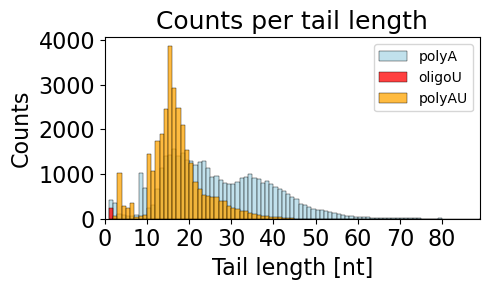

In [56]:
# Try to recreate following histogram to analyze how many counts have specific tail length

<AxesSubplot:xlabel='tail_type', ylabel='tail_len'>

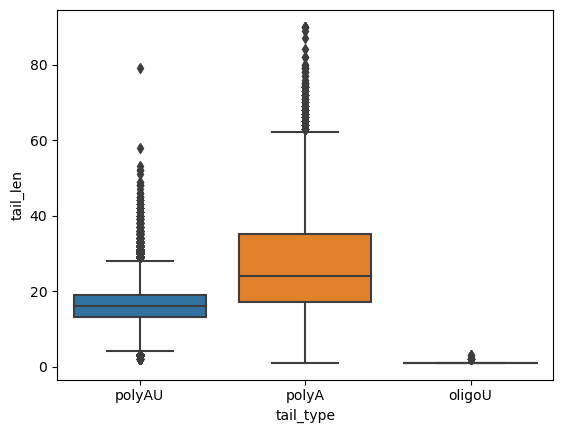

In [57]:
## try to recreate plot

<AxesSubplot:xlabel='gene_len', ylabel='tail_len'>

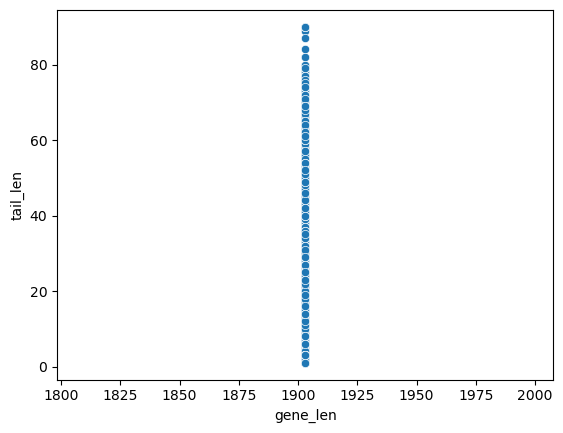

In [60]:
## try to recreate plot -  why it looks like this?


# response: we have ony one unique gene in the table, so only one unique gene_len

<AxesSubplot:xlabel='distance_to_TES', ylabel='Count'>

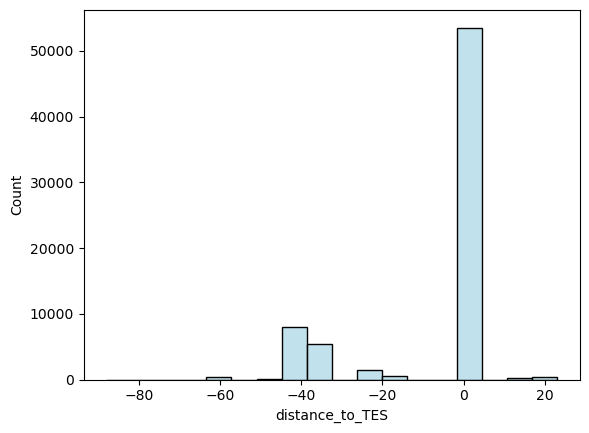

In [66]:
# Use tails_real to recreate the plots:

# distance_to TES

<AxesSubplot:xlabel='relative_distance_to_TES', ylabel='Count'>

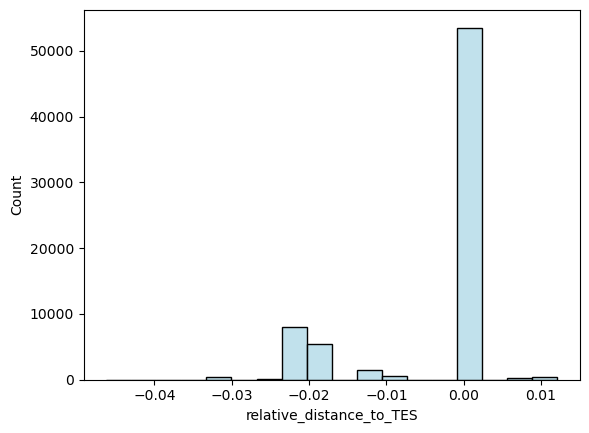

In [67]:
# relative_distance_to TES


## Most reads mapped near TES (transcription start site) - its a good neews!

<AxesSubplot:xlabel='relative_distance_to_TES', ylabel='Count'>

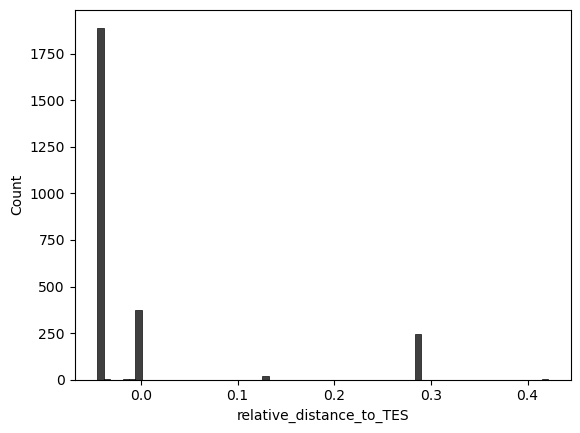

In [71]:
## try to create similar plot for 'no_tail' data (tails_subset, tail_type='no_tail')

# not so nice for reads without tails

# That's all! Thank you for your participation in the course